In [1]:
import pandas as pd
import numpy as np
import pickle
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load pickle file with results
with open('results.pkl', 'rb') as f:
    results = pickle.load(f)

cm = {}
fi = {}
roc = {}


# Print the results
for dataset, models in results.items():
    print(f"Dataset: {dataset}")
    approach = dataset.split('_')[0]
    dataset_name = "_".join(dataset.split('_')[1:])
    X_test = pd.read_csv(f"./datasets/preprocessed/{approach}/{dataset_name}/X_test.csv")
    y_test = pd.read_csv(f"./datasets/preprocessed/{approach}/{dataset_name}/y_test.csv")
    
    X_train = pd.read_csv(f"./datasets/preprocessed/{approach}/{dataset_name}/X_train.csv")
    y_train = pd.read_csv(f"./datasets/preprocessed/{approach}/{dataset_name}/y_train.csv")
    print(f"  X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")

    for model_name, model_results in models.items():
        print(f"  Model: {model_name}")
        y_pred = model_results['fitted_model'].predict(X_test)
        
        # Confusion matrix
        cm[(dataset,model_name)] = confusion_matrix(y_test, y_pred)
        

        # Feature importance
        if hasattr(model_results['fitted_model'], 'feature_importances_'):
                fi[(dataset,model_name)] = pd.DataFrame({
                    'Feature': X_test.columns,
                    'Importance': model_results['fitted_model'].feature_importances_
                }).sort_values(by='Importance', ascending=False)
        elif hasattr(model_results['fitted_model'], 'coef_'):
            fi[(dataset,model_name)] = pd.DataFrame({
                'Feature': X_test.columns,
                'Importance': np.abs(model_results['fitted_model'].coef_[0])
            }).sort_values(by='Importance', ascending=False)
        else:
            fi[(dataset, model_name)] = None


Dataset: Initial_real_data
  X_train shape: (1688, 19), y_train shape: (1688, 1)
  Model: Random Forest
  Model: GradientBoosting
  Model: XGBoost
  Model: $k$NN
  Model: LGBM
Dataset: Initial_synth_data
  X_train shape: (20717, 19), y_train shape: (20717, 1)
  Model: Random Forest
  Model: GradientBoosting
  Model: XGBoost
  Model: $k$NN
  Model: LGBM
Dataset: Extra_real_data
  X_train shape: (381, 19), y_train shape: (381, 1)
  Model: Random Forest
  Model: GradientBoosting
  Model: XGBoost
  Model: $k$NN
  Model: LGBM
Dataset: Extra_real_pseudoreal_data
  X_train shape: (2014, 19), y_train shape: (2014, 1)
  Model: Random Forest
  Model: GradientBoosting
  Model: XGBoost
  Model: $k$NN
  Model: LGBM
Dataset: Extra_real_pseudoreal_synth_data
  X_train shape: (22175, 19), y_train shape: (22175, 1)
  Model: Random Forest
  Model: GradientBoosting
  Model: XGBoost
  Model: $k$NN
  Model: LGBM


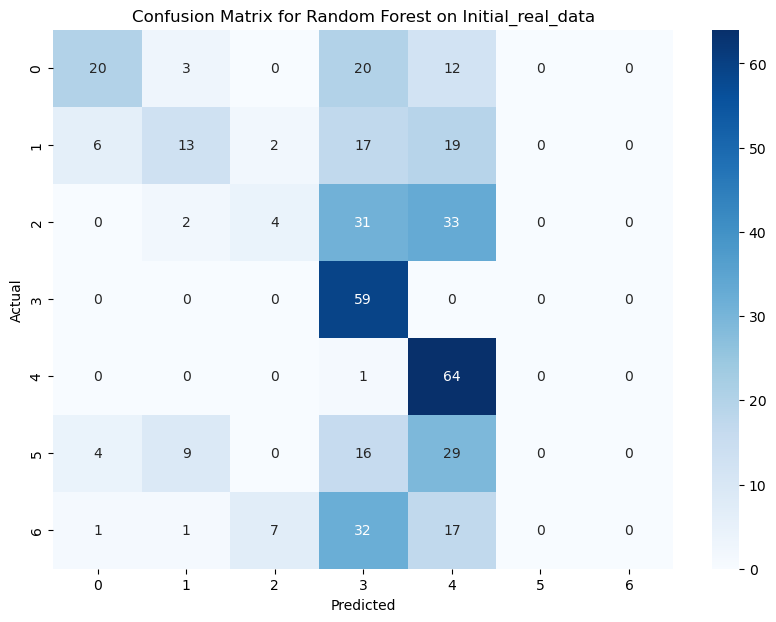

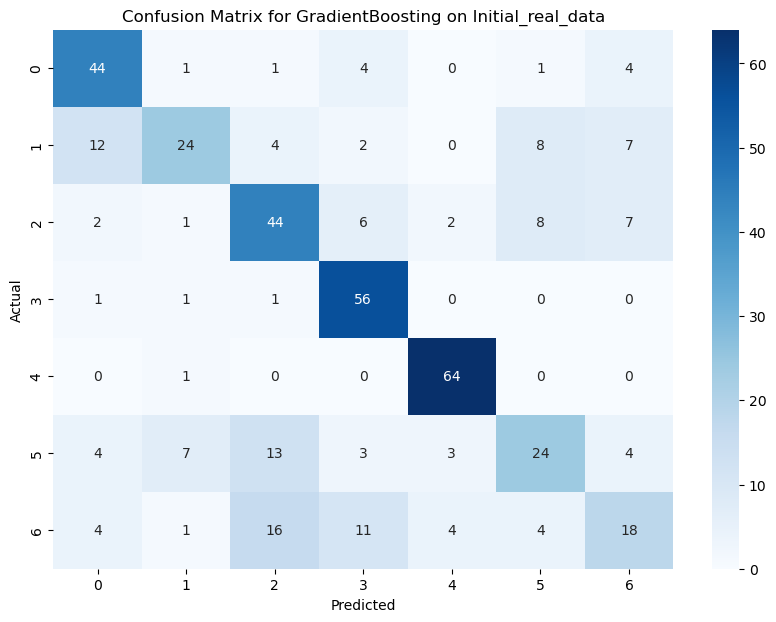

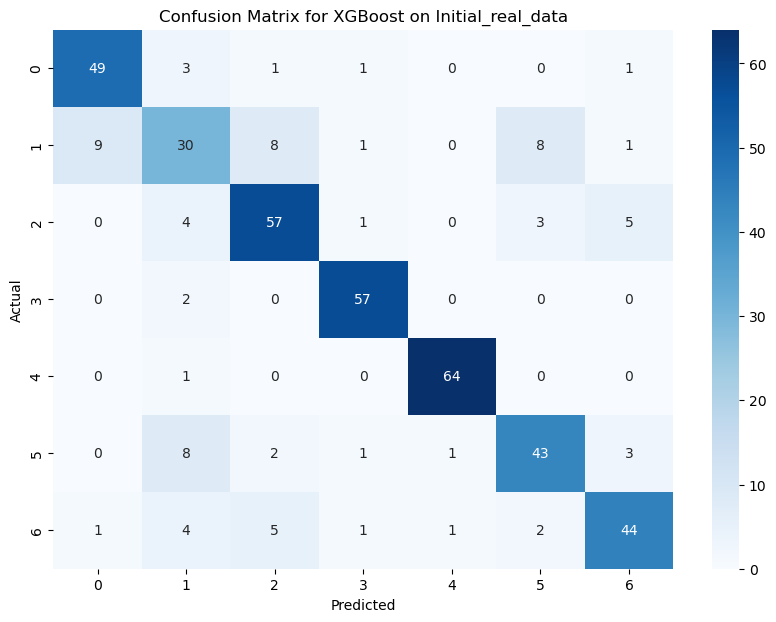

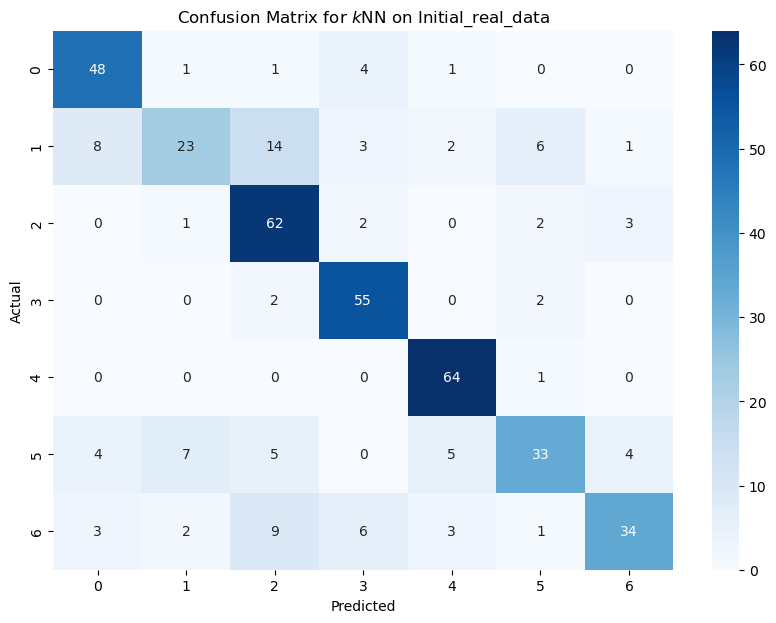

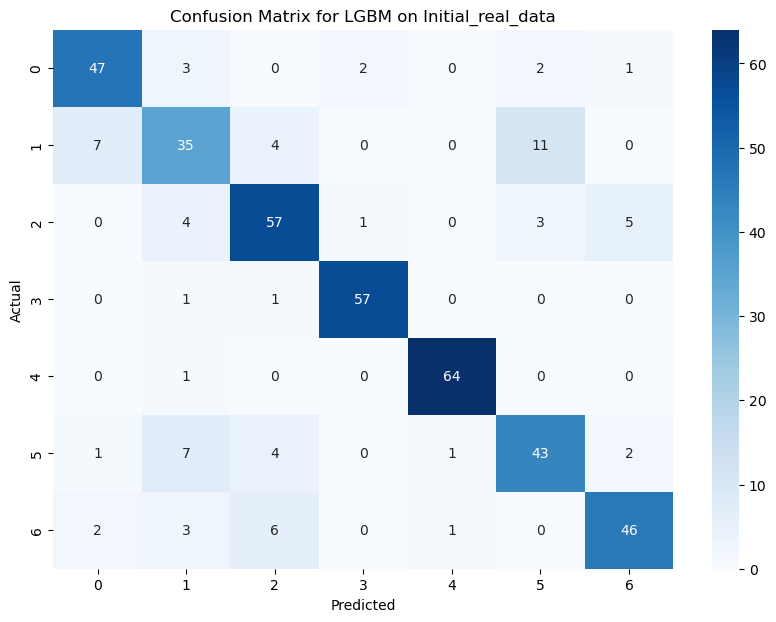

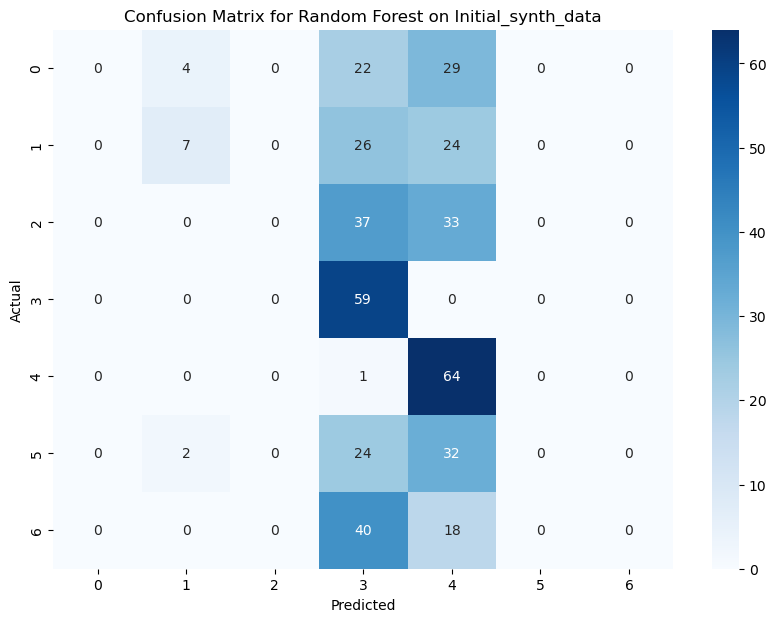

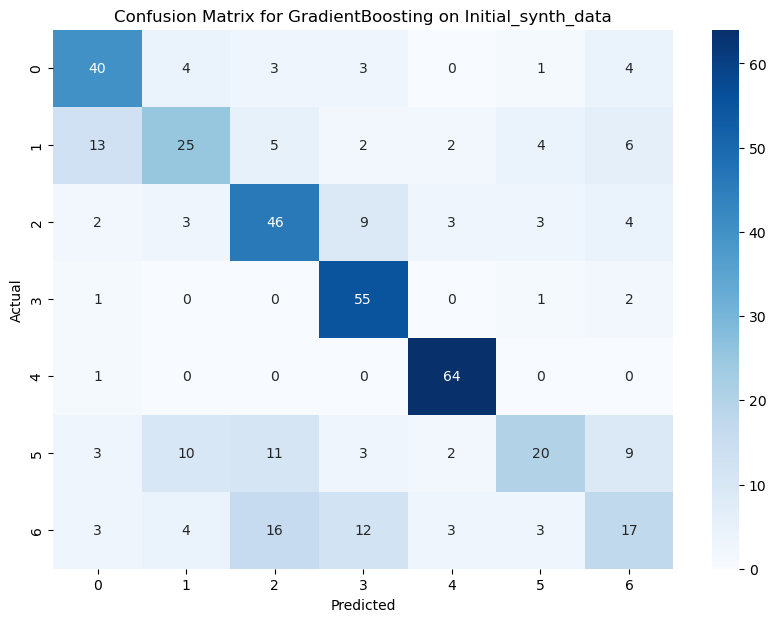

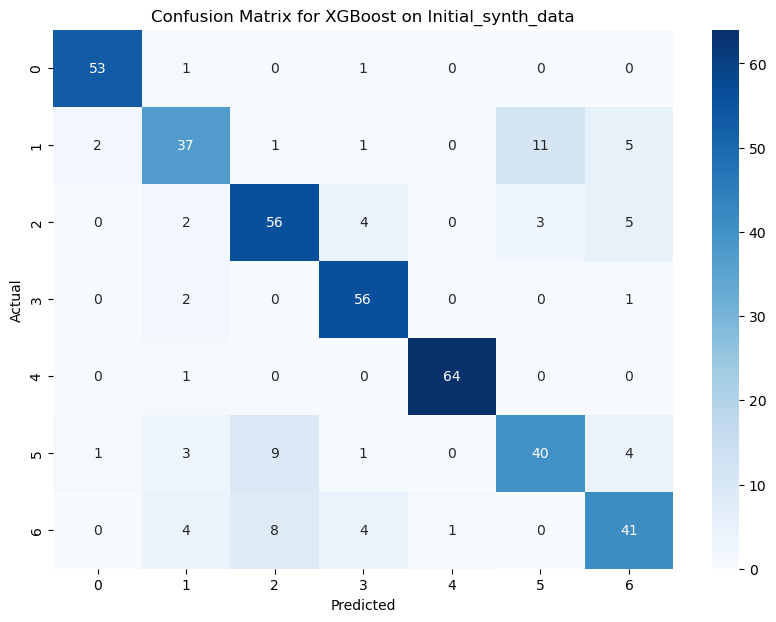

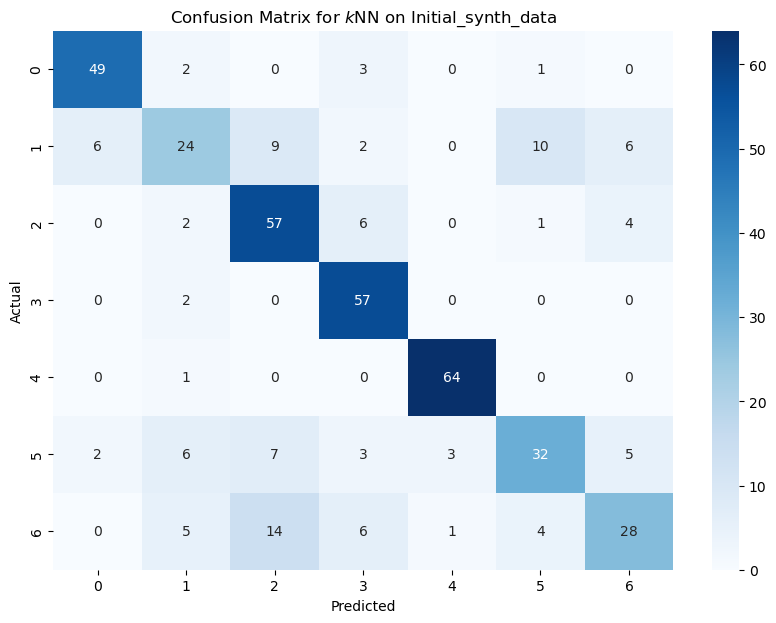

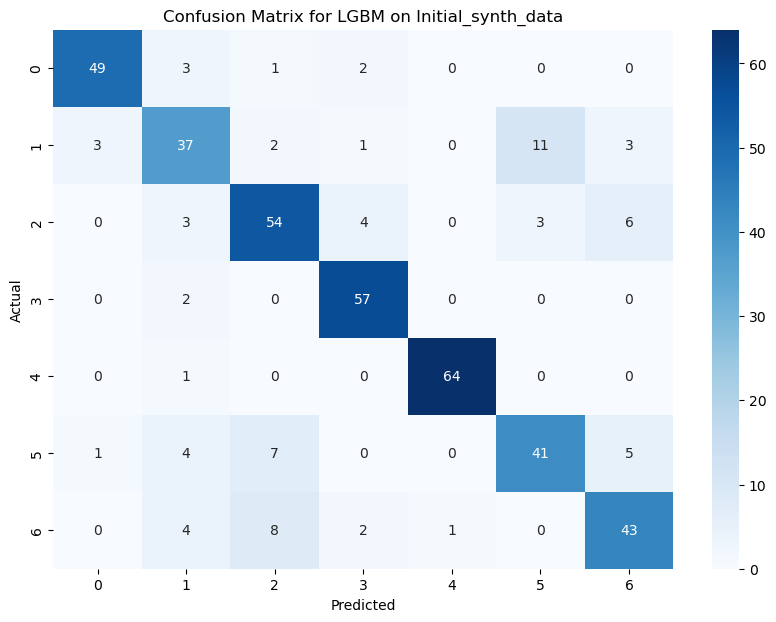

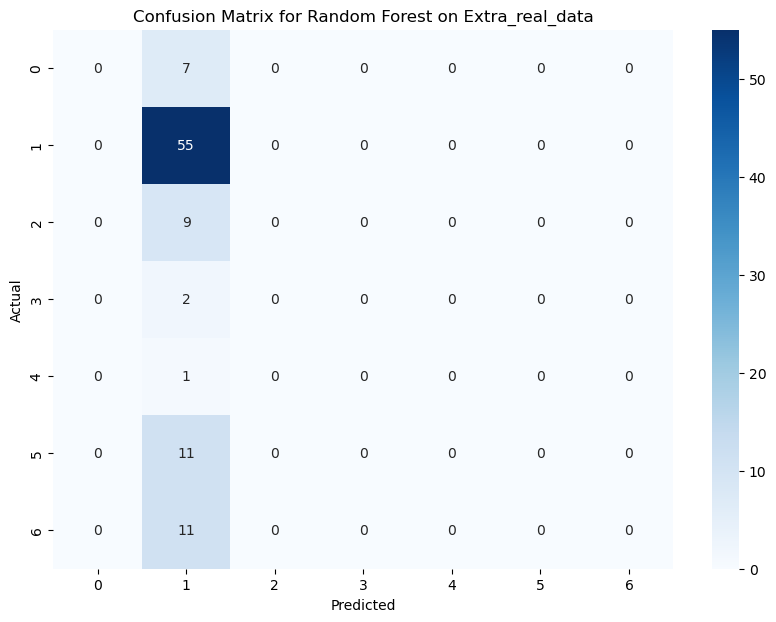

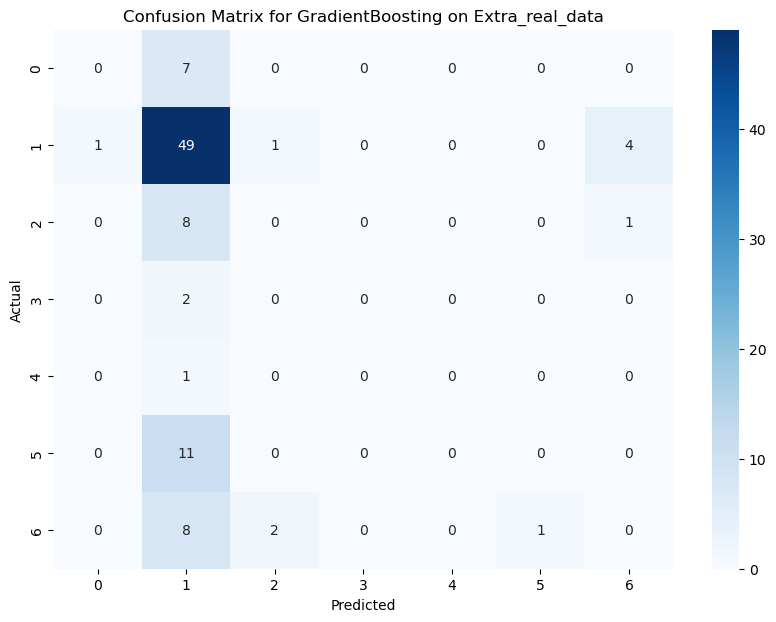

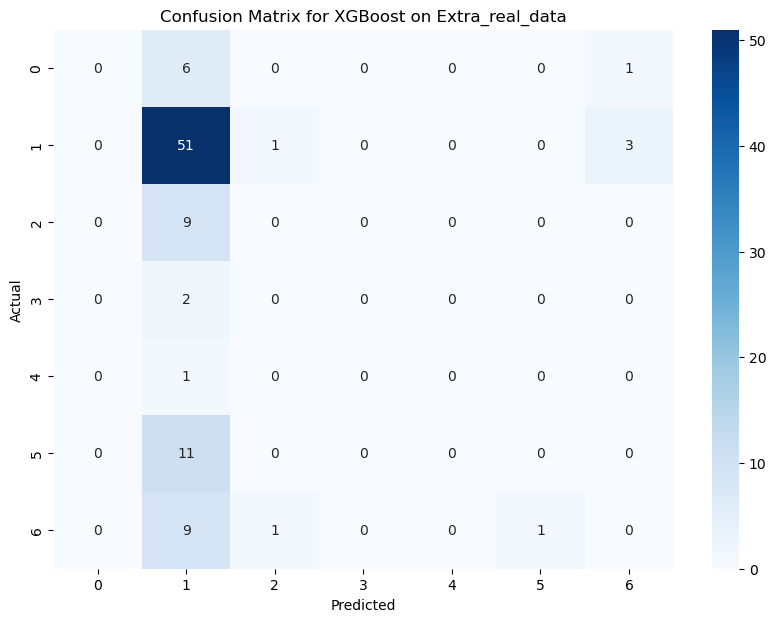

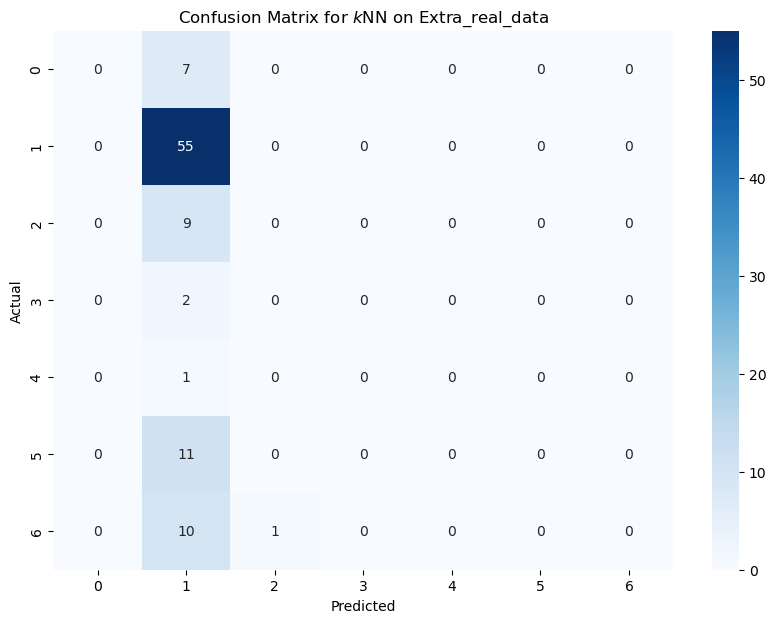

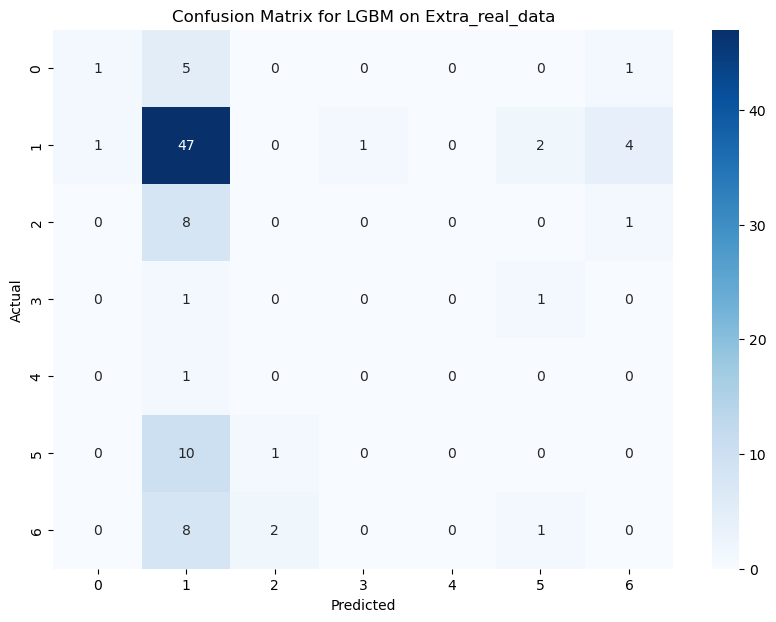

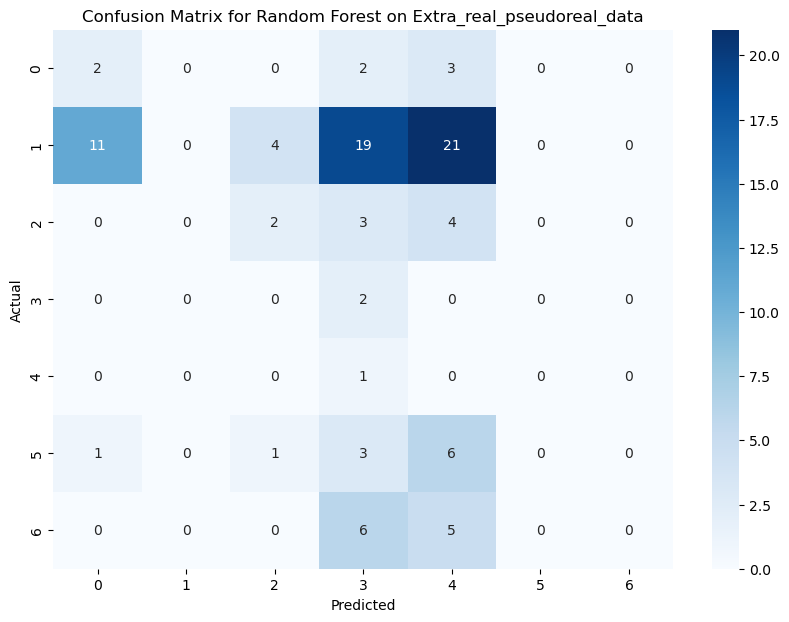

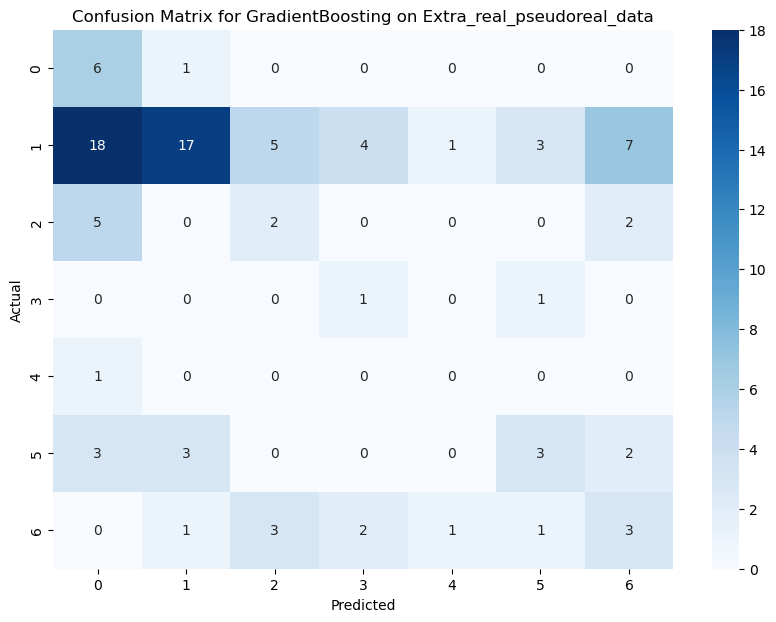

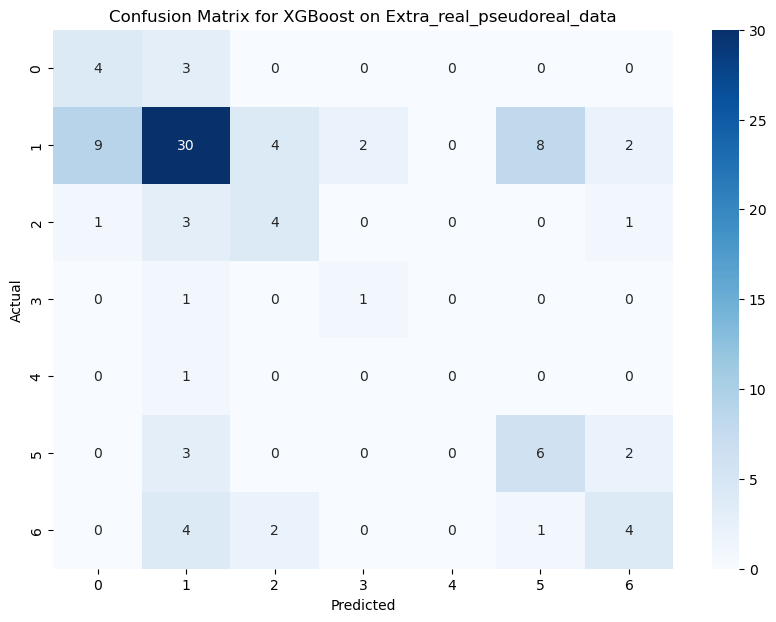

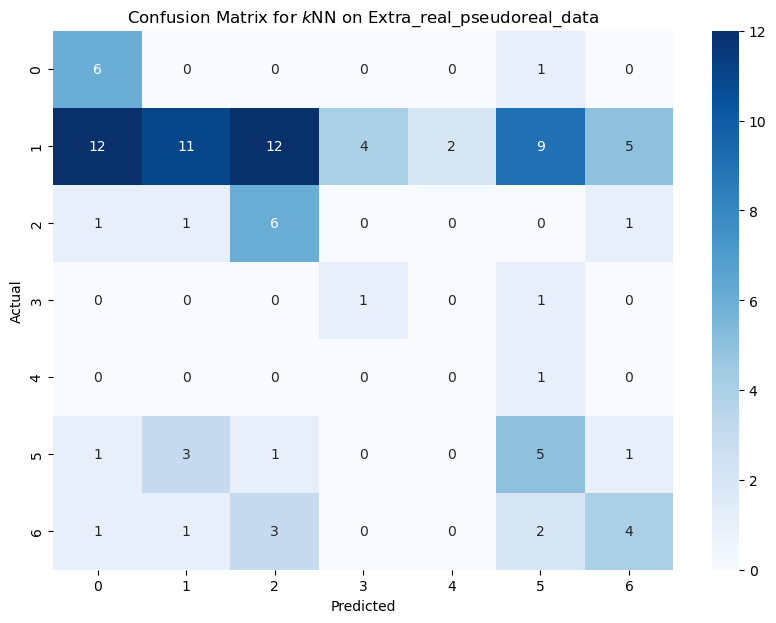

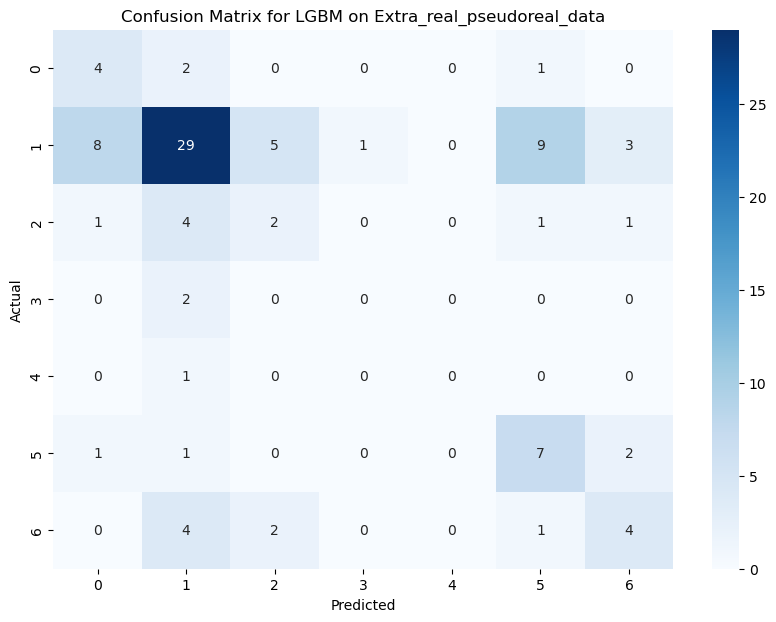

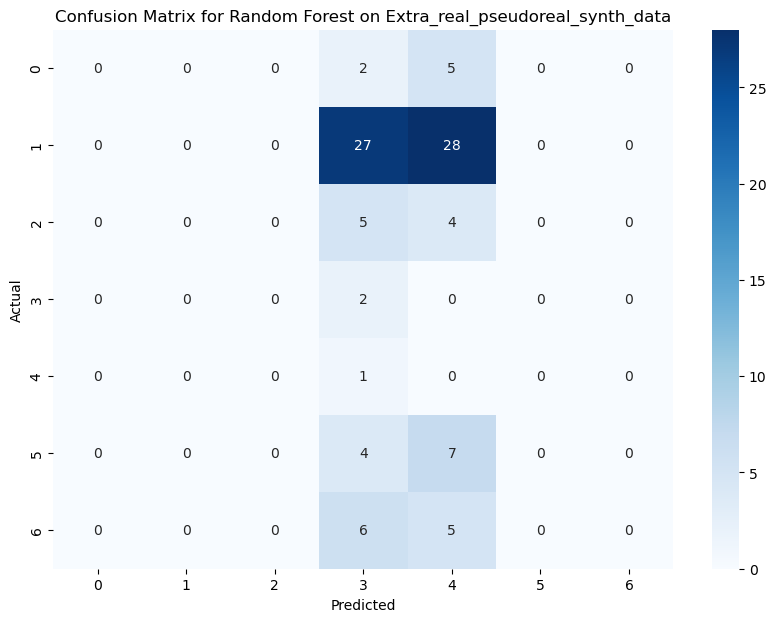

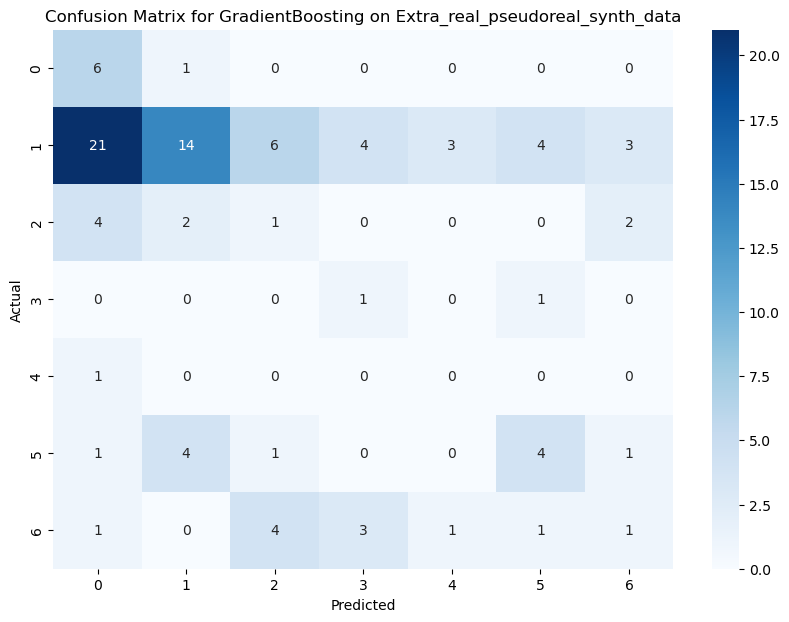

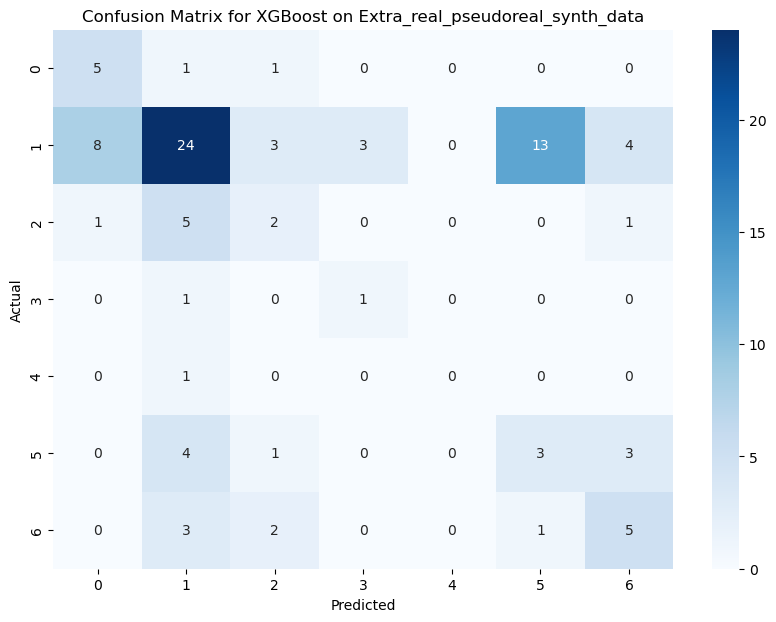

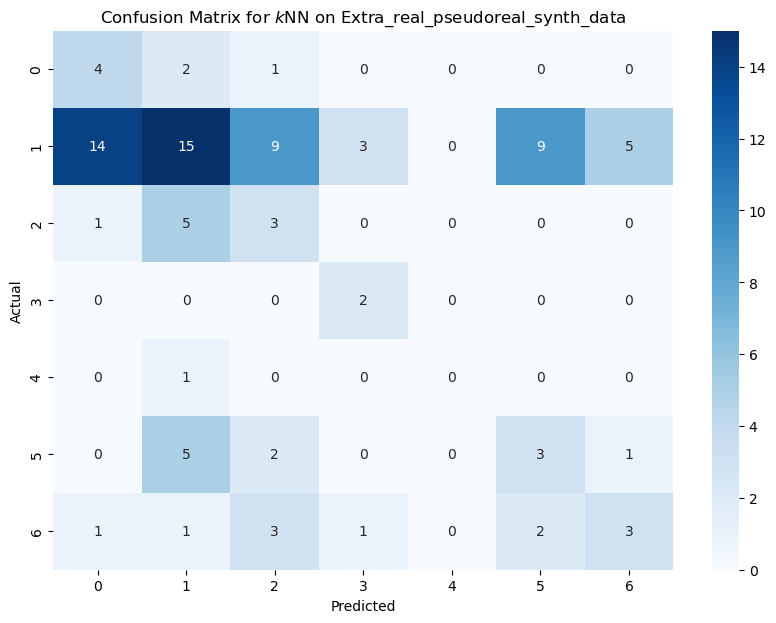

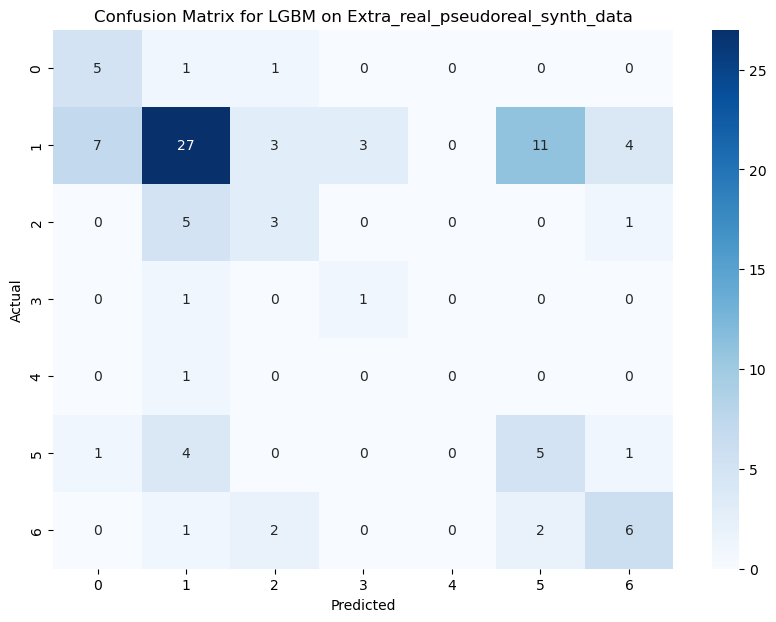

In [6]:
# Plot confusion matrices
for (dataset, model_name), cm_df in cm.items():
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix for {model_name} on {dataset}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


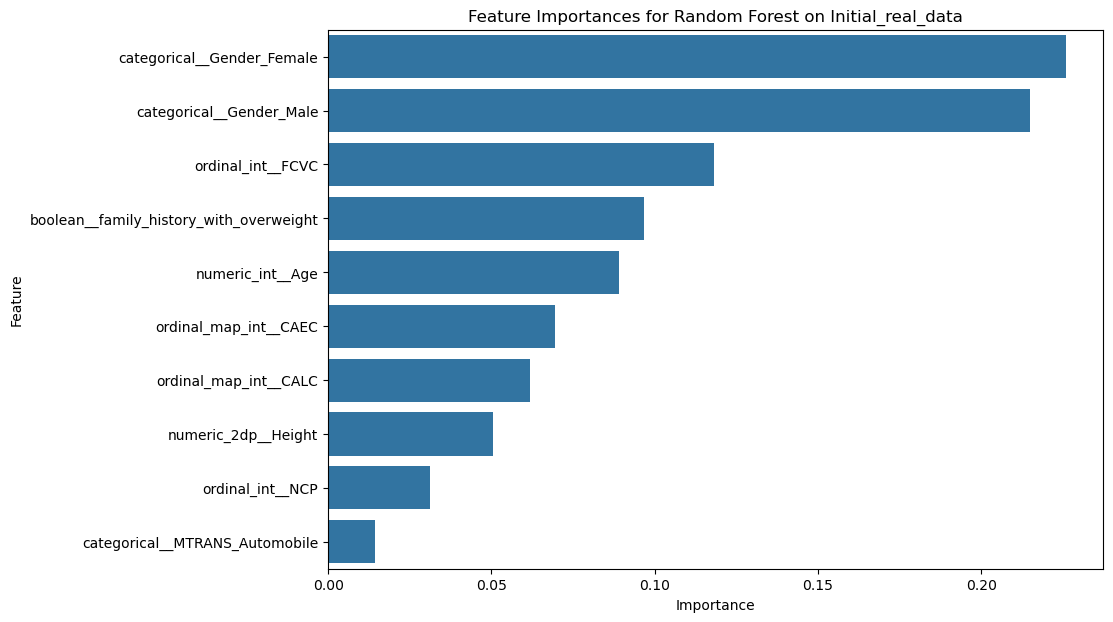

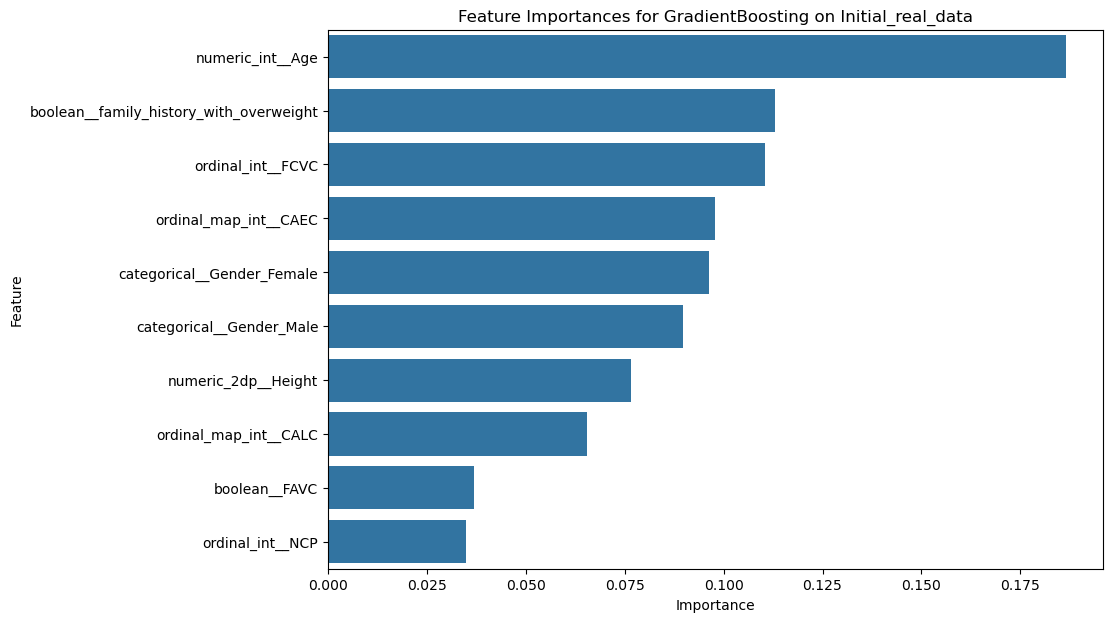

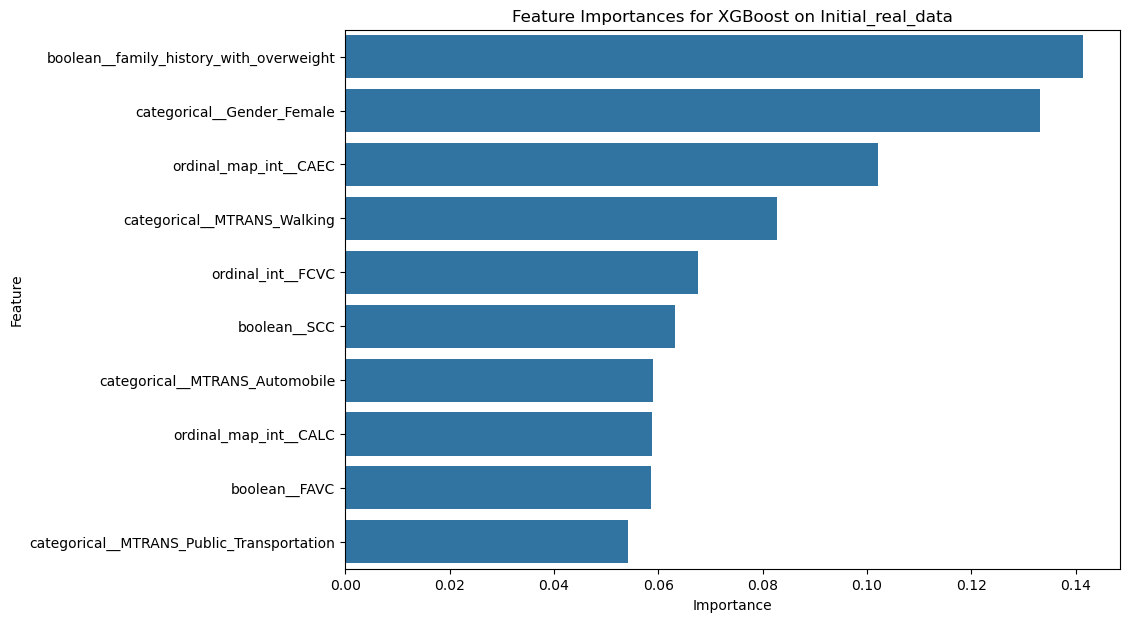

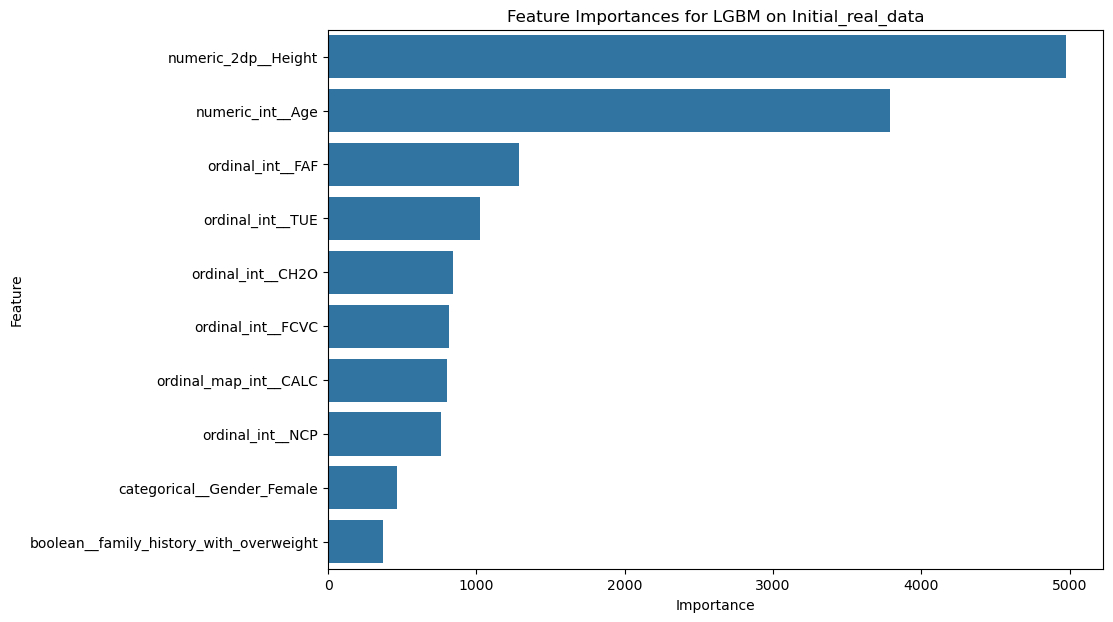

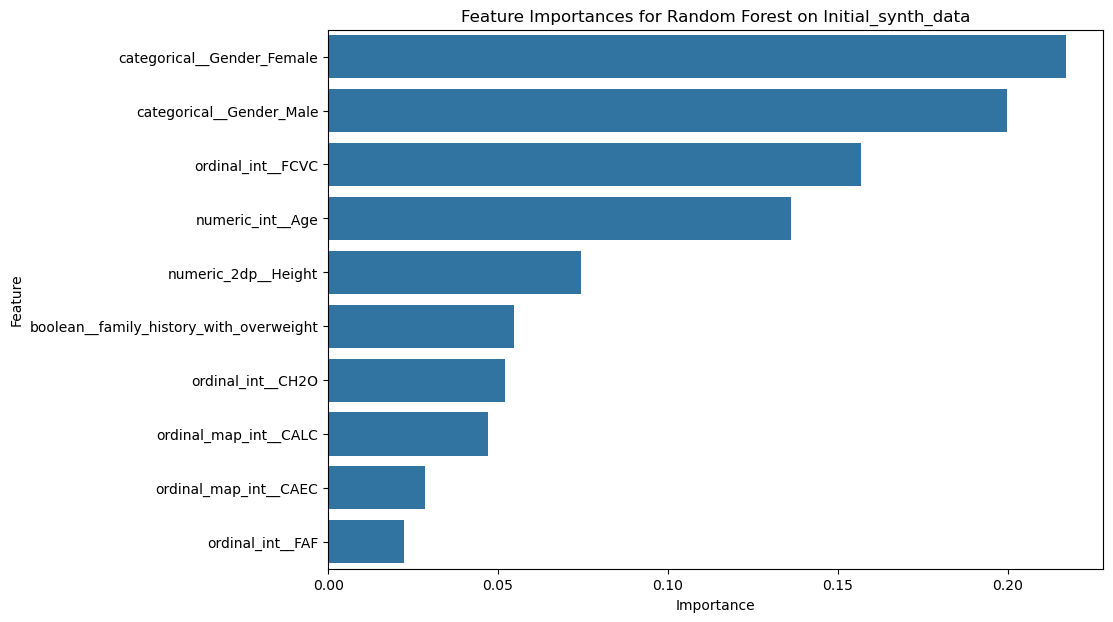

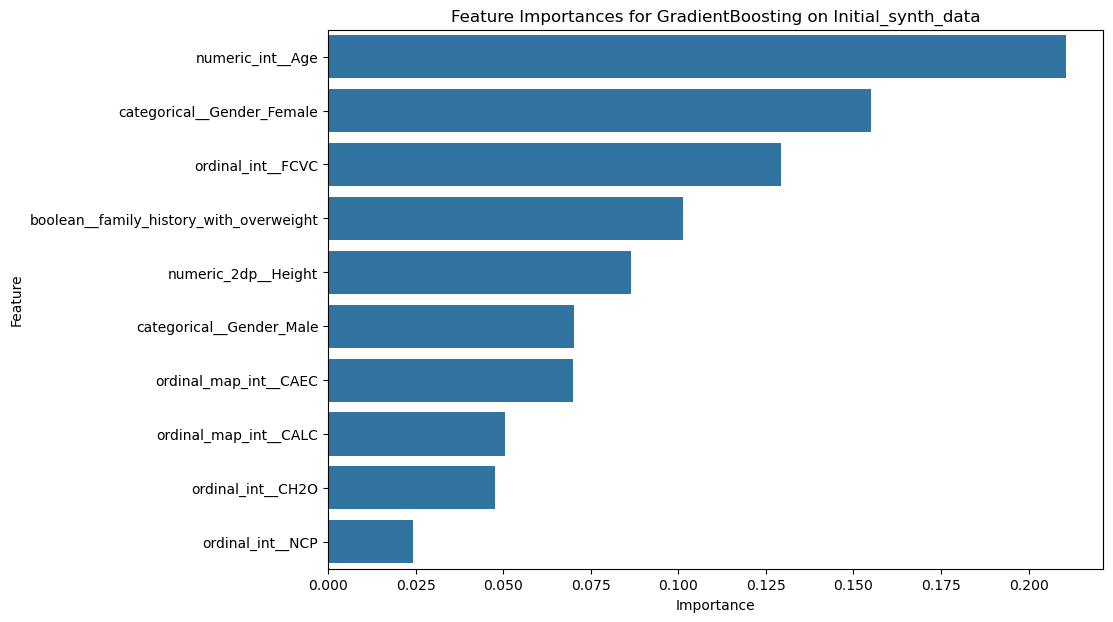

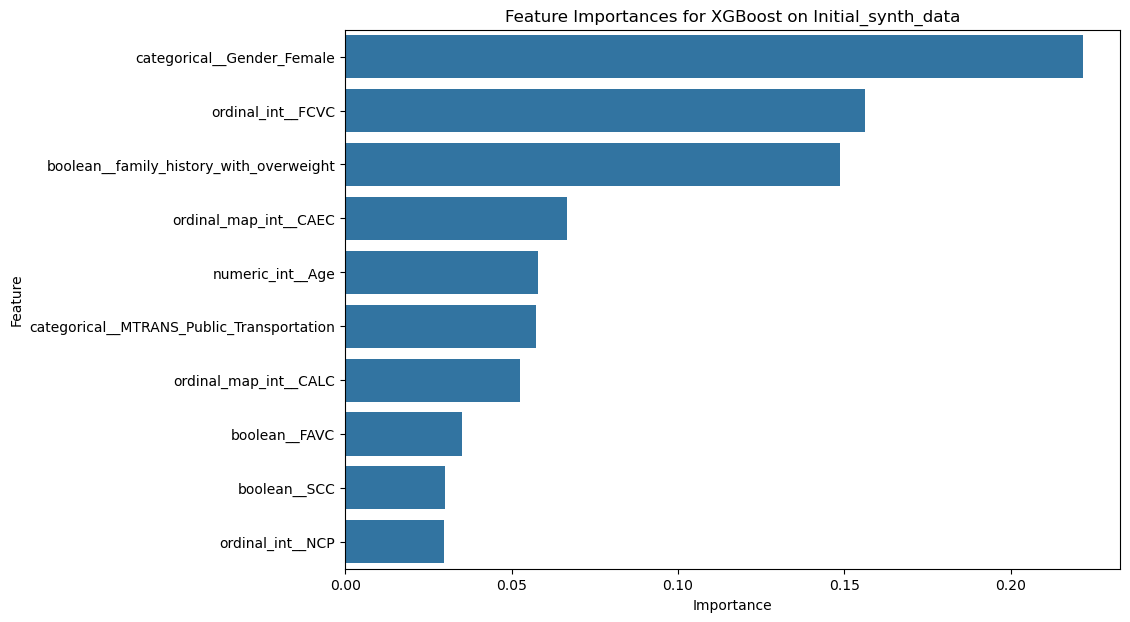

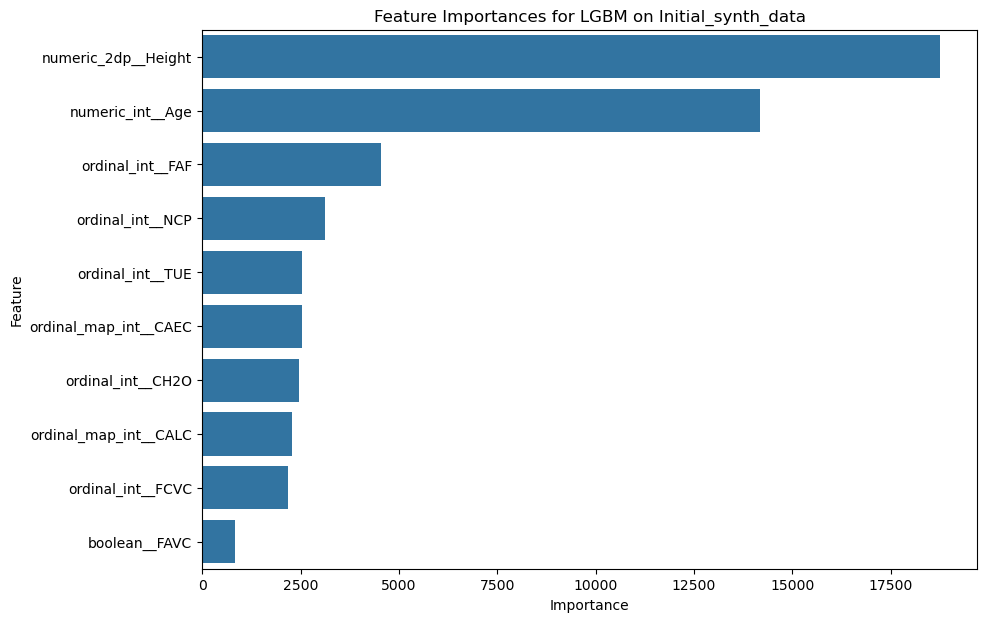

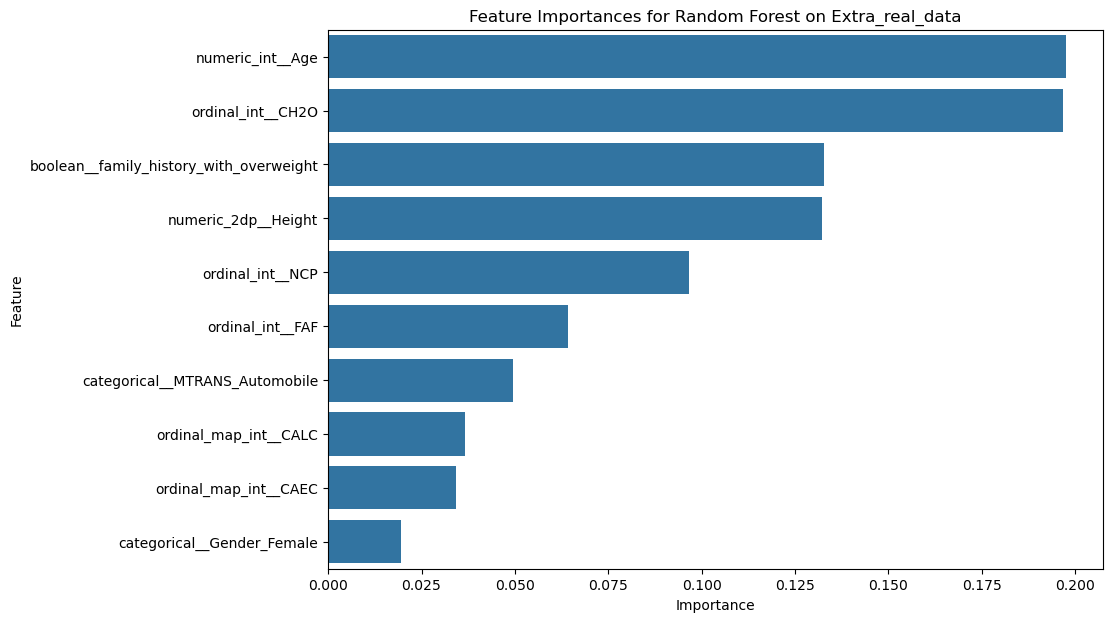

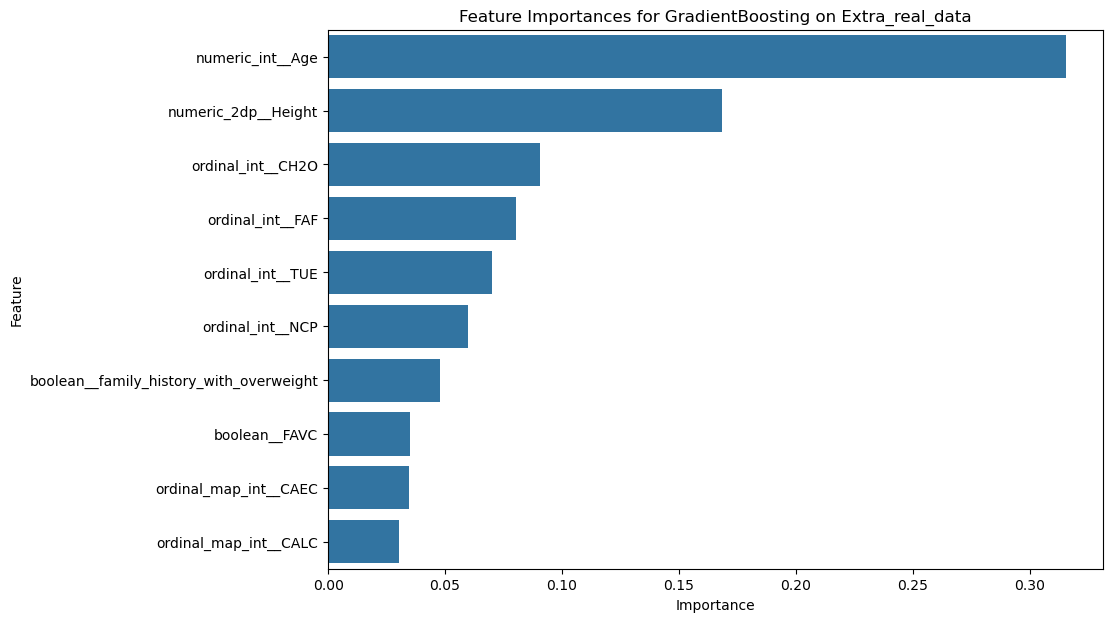

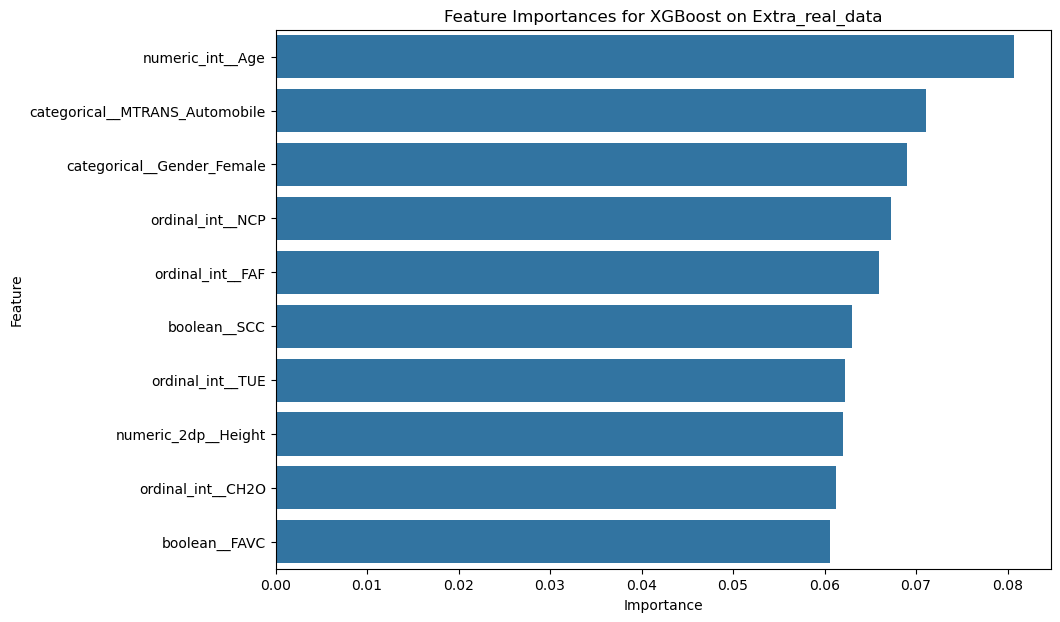

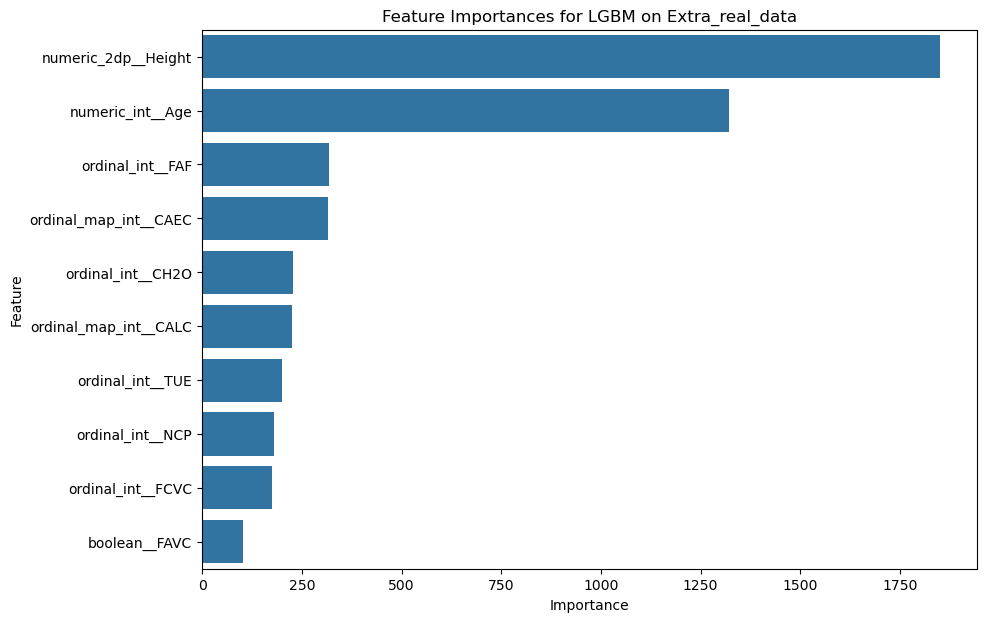

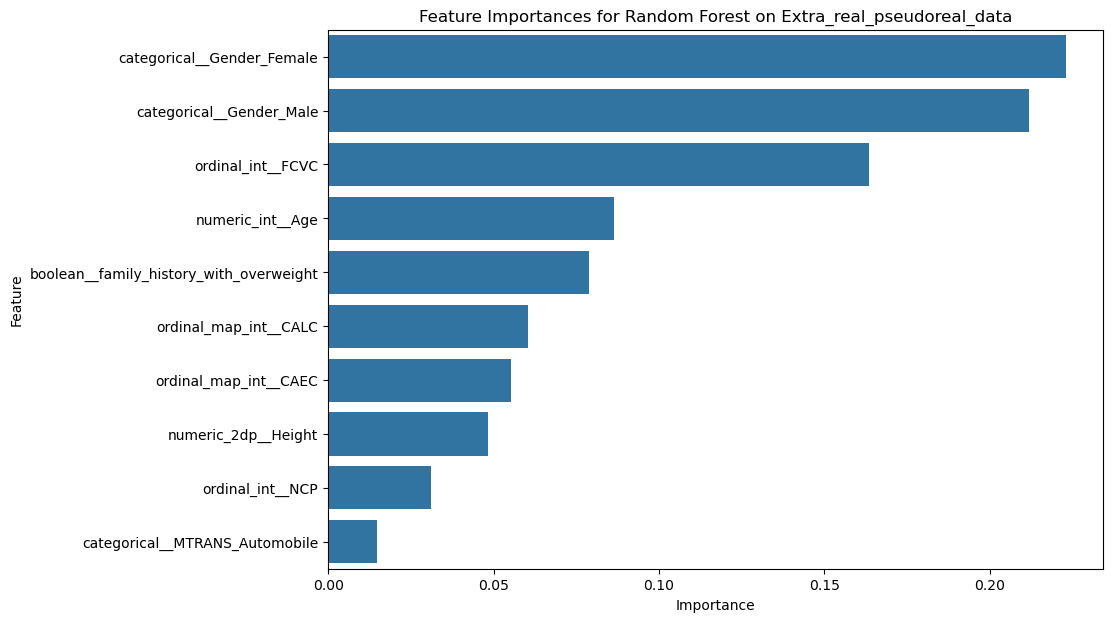

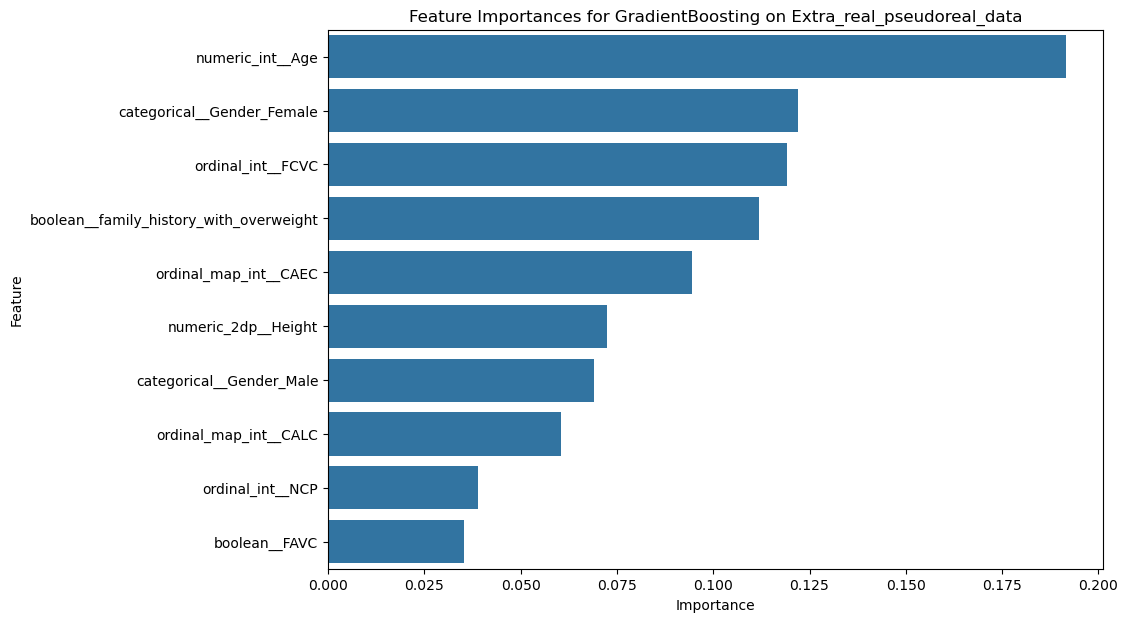

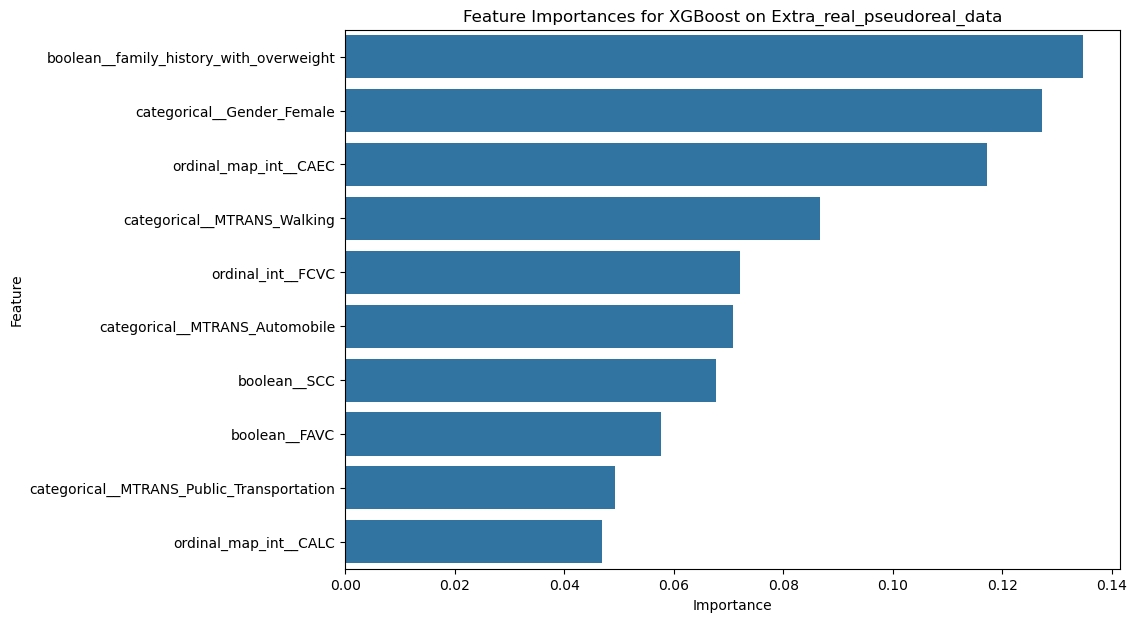

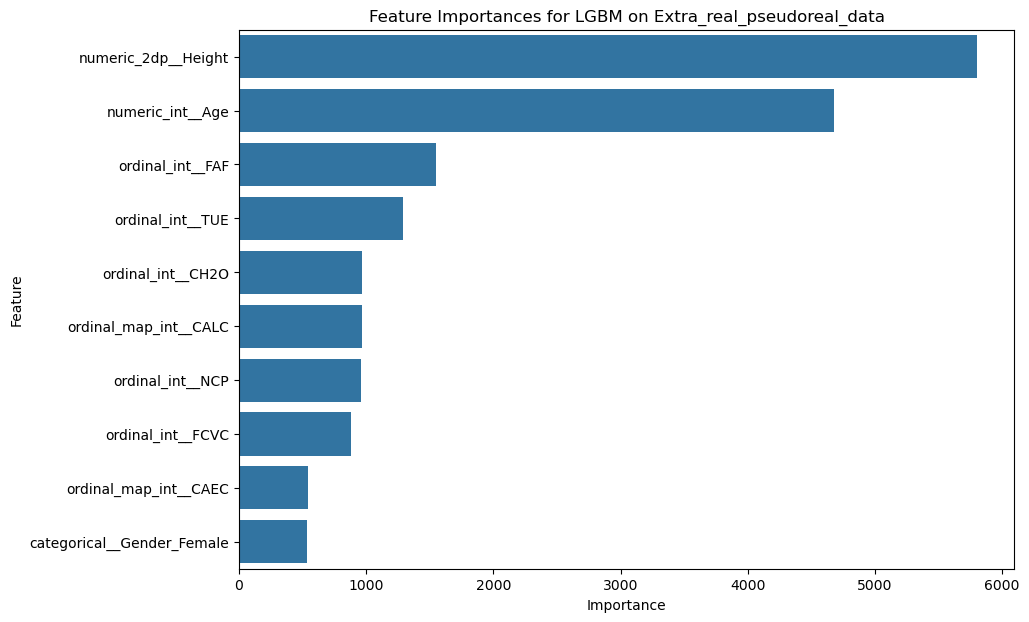

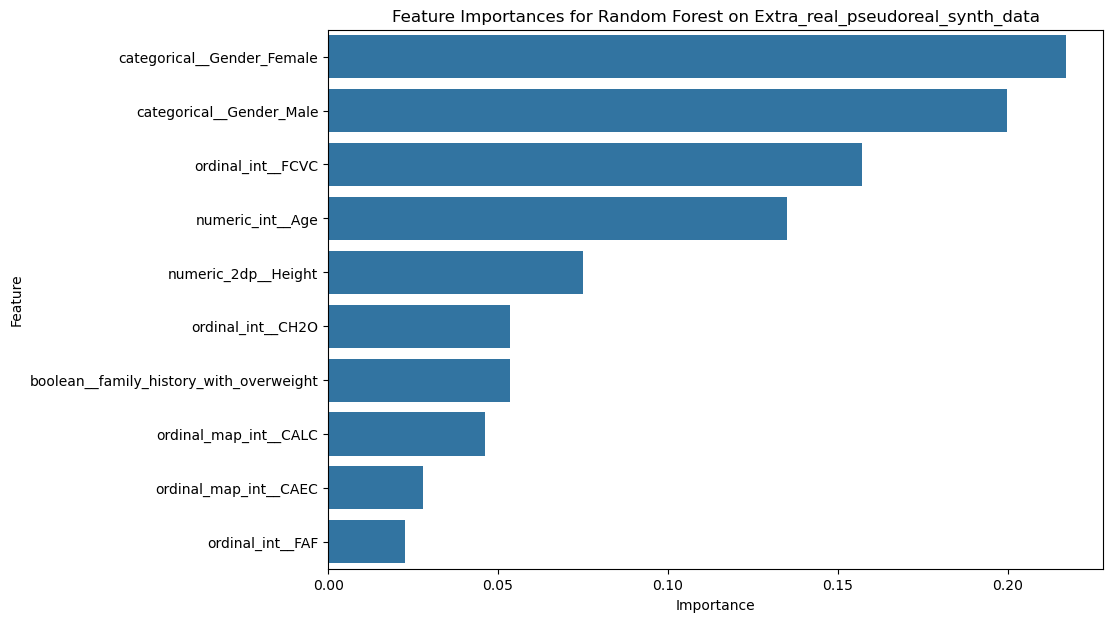

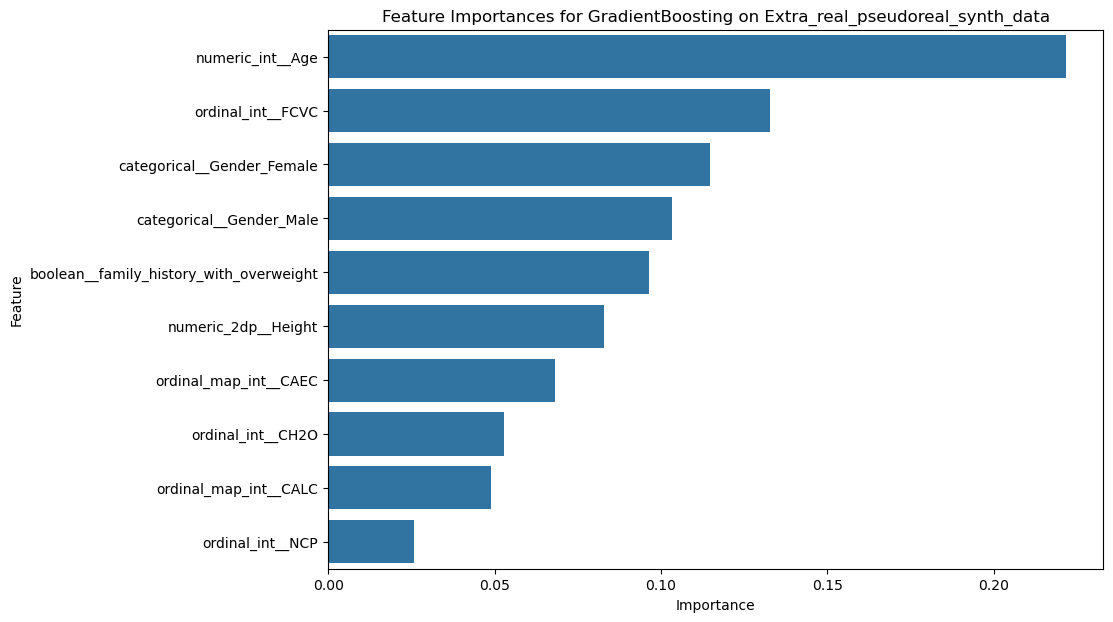

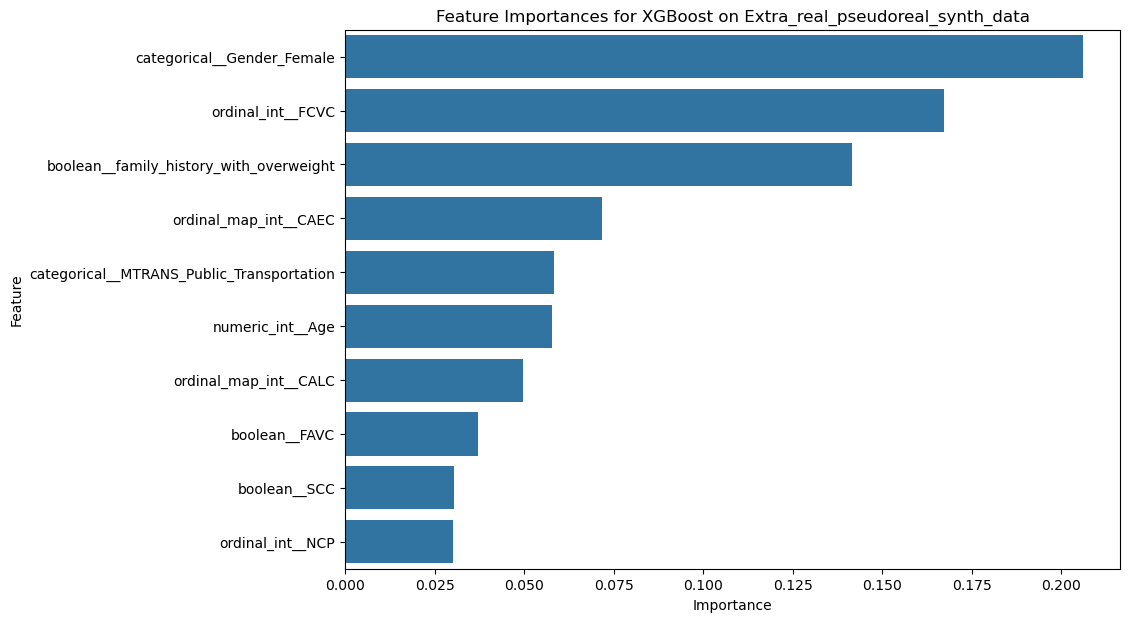

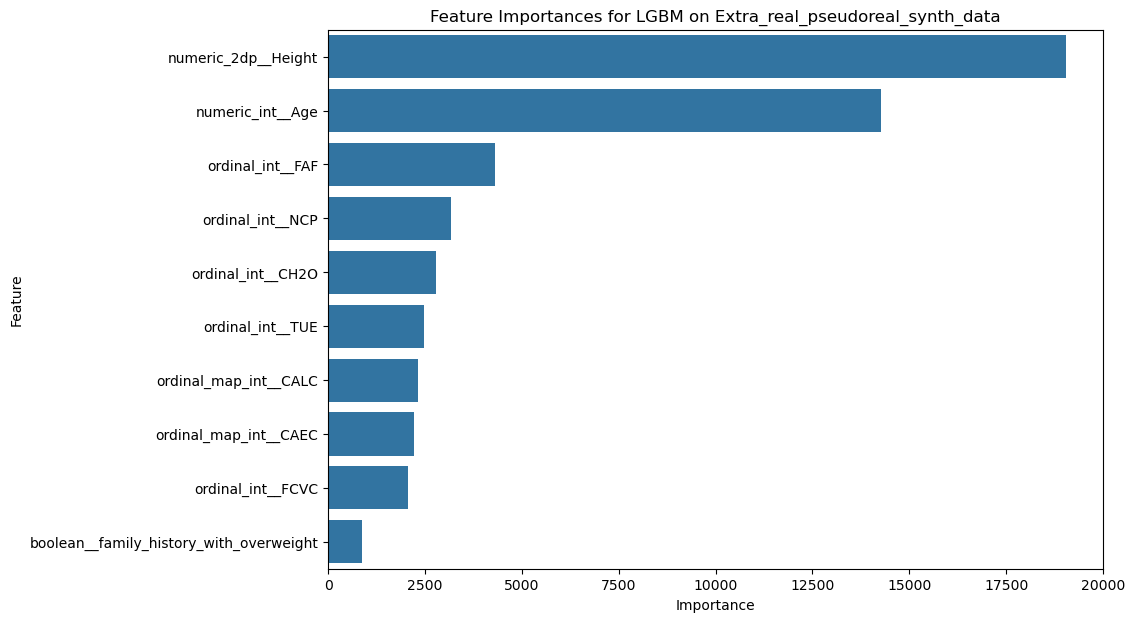

In [4]:
# Feature importance plots
# Plot the feature importances
for (dataset, model_name), fi_df in fi.items():
    if fi_df is not None:
        plt.figure(figsize=(10, 7))
        sns.barplot(x='Importance', y='Feature', data=fi_df.head(10))
        plt.title(f"Feature Importances for {model_name} on {dataset}")
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.show()

In [9]:
'''
# Classification report
for dataset, models in results.items():
    print(f"Dataset: {dataset}")
    for model_name, model_results in models.items():
        y_pred = model_results['fitted_model'].predict(X_test)
        print(f"  Model: {model_name}")
        print(classification_report(y_test, y_pred, zero_division=0))
        print("\n")
'''

import pandas as pd
from sklearn.metrics import classification_report
from IPython.display import display

# Classification report with nicer tables
for dataset, models in results.items():
    print(f"\n## Dataset: {dataset}")
    
    for model_name, model_results in models.items():
        print(f"\n### Model: {model_name}")
        
        # Get predictions
        y_pred = model_results['fitted_model'].predict(X_test)
        
        # Get classification report as dict and convert to DataFrame
        report_dict = classification_report(y_test, y_pred, zero_division=0, output_dict=True)
        report_df = pd.DataFrame(report_dict).T
        
        # Round for cleaner display
        report_df = report_df.round(3)
        
        # Display as a styled pandas DataFrame
        display(report_df.style.background_gradient(cmap='Blues'))

# 


## Dataset: Initial_real_data

### Model: Random Forest


,precision,recall,f1-score,support
0,0.231000,0.429000,0.300000,7.000000
1,0.667000,0.145000,0.239000,55.000000
2,0.500000,0.333000,0.400000,9.000000
3,0.069000,1.000000,0.129000,2.000000
4,0.000000,0.000000,0.000000,1.000000
5,0.000000,0.000000,0.000000,11.000000
6,0.000000,0.000000,0.000000,11.000000
accuracy,0.167000,0.167000,0.167000,0.167000
macro avg,0.209000,0.272000,0.153000,96.000000
weighted avg,0.447000,0.167000,0.199000,96.000000



### Model: GradientBoosting


,precision,recall,f1-score,support
0,0.161000,0.714000,0.263000,7.000000
1,0.667000,0.327000,0.439000,55.000000
2,0.111000,0.111000,0.111000,9.000000
3,0.167000,0.500000,0.250000,2.000000
4,0.000000,0.000000,0.000000,1.000000
5,0.429000,0.273000,0.333000,11.000000
6,0.214000,0.273000,0.240000,11.000000
accuracy,0.323000,0.323000,0.323000,0.323000
macro avg,0.250000,0.314000,0.234000,96.000000
weighted avg,0.481000,0.323000,0.352000,96.000000



### Model: XGBoost


,precision,recall,f1-score,support
0,0.667000,0.857000,0.750000,7.000000
1,0.836000,0.836000,0.836000,55.000000
2,0.700000,0.778000,0.737000,9.000000
3,0.333000,0.500000,0.400000,2.000000
4,0.000000,0.000000,0.000000,1.000000
5,0.875000,0.636000,0.737000,11.000000
6,0.909000,0.909000,0.909000,11.000000
accuracy,0.802000,0.802000,0.802000,0.802000
macro avg,0.617000,0.645000,0.624000,96.000000
weighted avg,0.805000,0.802000,0.800000,96.000000



### Model: $k$NN


,precision,recall,f1-score,support
0,0.273000,0.857000,0.414000,7.000000
1,0.783000,0.327000,0.462000,55.000000
2,0.333000,0.667000,0.444000,9.000000
3,0.250000,0.500000,0.333000,2.000000
4,0.000000,0.000000,0.000000,1.000000
5,0.417000,0.455000,0.435000,11.000000
6,0.615000,0.727000,0.667000,11.000000
accuracy,0.458000,0.458000,0.458000,0.458000
macro avg,0.382000,0.505000,0.394000,96.000000
weighted avg,0.623000,0.458000,0.469000,96.000000



### Model: LGBM


,precision,recall,f1-score,support
0,0.625000,0.714000,0.667000,7.000000
1,0.849000,0.818000,0.833000,55.000000
2,0.636000,0.778000,0.700000,9.000000
3,0.333000,0.500000,0.400000,2.000000
4,0.000000,0.000000,0.000000,1.000000
5,0.583000,0.636000,0.609000,11.000000
6,1.000000,0.818000,0.900000,11.000000
accuracy,0.771000,0.771000,0.771000,0.771000
macro avg,0.575000,0.609000,0.587000,96.000000
weighted avg,0.780000,0.771000,0.773000,96.000000



## Dataset: Initial_synth_data

### Model: Random Forest


,precision,recall,f1-score,support
0,0.000000,0.000000,0.000000,7.000000
1,0.500000,0.018000,0.035000,55.000000
2,0.000000,0.000000,0.000000,9.000000
3,0.043000,1.000000,0.082000,2.000000
4,0.000000,0.000000,0.000000,1.000000
5,0.000000,0.000000,0.000000,11.000000
6,0.000000,0.000000,0.000000,11.000000
accuracy,0.031000,0.031000,0.031000,0.031000
macro avg,0.078000,0.145000,0.017000,96.000000
weighted avg,0.287000,0.031000,0.022000,96.000000



### Model: GradientBoosting


,precision,recall,f1-score,support
0,0.167000,0.714000,0.270000,7.000000
1,0.654000,0.309000,0.420000,55.000000
2,0.083000,0.111000,0.095000,9.000000
3,0.143000,0.500000,0.222000,2.000000
4,0.000000,0.000000,0.000000,1.000000
5,0.400000,0.364000,0.381000,11.000000
6,0.143000,0.091000,0.111000,11.000000
accuracy,0.302000,0.302000,0.302000,0.302000
macro avg,0.227000,0.298000,0.214000,96.000000
weighted avg,0.460000,0.302000,0.330000,96.000000



### Model: XGBoost


,precision,recall,f1-score,support
0,0.500000,1.000000,0.667000,7.000000
1,0.714000,0.636000,0.673000,55.000000
2,0.333000,0.111000,0.167000,9.000000
3,0.333000,0.500000,0.400000,2.000000
4,0.000000,0.000000,0.000000,1.000000
5,0.438000,0.636000,0.519000,11.000000
6,0.545000,0.545000,0.545000,11.000000
accuracy,0.594000,0.594000,0.594000,0.594000
macro avg,0.409000,0.490000,0.424000,96.000000
weighted avg,0.597000,0.594000,0.580000,96.000000



### Model: $k$NN


,precision,recall,f1-score,support
0,0.278000,0.714000,0.400000,7.000000
1,0.658000,0.455000,0.538000,55.000000
2,0.133000,0.222000,0.167000,9.000000
3,0.200000,0.500000,0.286000,2.000000
4,0.000000,0.000000,0.000000,1.000000
5,0.417000,0.455000,0.435000,11.000000
6,0.500000,0.364000,0.421000,11.000000
accuracy,0.438000,0.438000,0.438000,0.438000
macro avg,0.312000,0.387000,0.321000,96.000000
weighted avg,0.519000,0.438000,0.457000,96.000000



### Model: LGBM


,precision,recall,f1-score,support
0,0.700000,1.000000,0.824000,7.000000
1,0.796000,0.709000,0.750000,55.000000
2,0.600000,0.333000,0.429000,9.000000
3,0.333000,0.500000,0.400000,2.000000
4,0.000000,0.000000,0.000000,1.000000
5,0.412000,0.636000,0.500000,11.000000
6,0.750000,0.818000,0.783000,11.000000
accuracy,0.688000,0.688000,0.688000,0.688000
macro avg,0.513000,0.571000,0.526000,96.000000
weighted avg,0.703000,0.688000,0.685000,96.000000



## Dataset: Extra_real_data

### Model: Random Forest


,precision,recall,f1-score,support
0,0.000000,0.000000,0.000000,7.000000
1,0.573000,1.000000,0.728000,55.000000
2,0.000000,0.000000,0.000000,9.000000
3,0.000000,0.000000,0.000000,2.000000
4,0.000000,0.000000,0.000000,1.000000
5,0.000000,0.000000,0.000000,11.000000
6,0.000000,0.000000,0.000000,11.000000
accuracy,0.573000,0.573000,0.573000,0.573000
macro avg,0.082000,0.143000,0.104000,96.000000
weighted avg,0.328000,0.573000,0.417000,96.000000



### Model: GradientBoosting


,precision,recall,f1-score,support
0,0.000000,0.000000,0.000000,7.000000
1,0.575000,0.909000,0.704000,55.000000
2,0.000000,0.000000,0.000000,9.000000
3,0.000000,0.000000,0.000000,2.000000
4,0.000000,0.000000,0.000000,1.000000
5,0.000000,0.000000,0.000000,11.000000
6,0.000000,0.000000,0.000000,11.000000
accuracy,0.521000,0.521000,0.521000,0.521000
macro avg,0.082000,0.130000,0.101000,96.000000
weighted avg,0.329000,0.521000,0.403000,96.000000



### Model: XGBoost


,precision,recall,f1-score,support
0,0.000000,0.000000,0.000000,7.000000
1,0.567000,0.927000,0.703000,55.000000
2,0.000000,0.000000,0.000000,9.000000
3,0.000000,0.000000,0.000000,2.000000
4,0.000000,0.000000,0.000000,1.000000
5,0.000000,0.000000,0.000000,11.000000
6,0.000000,0.000000,0.000000,11.000000
accuracy,0.531000,0.531000,0.531000,0.531000
macro avg,0.081000,0.132000,0.100000,96.000000
weighted avg,0.325000,0.531000,0.403000,96.000000



### Model: $k$NN


,precision,recall,f1-score,support
0,0.000000,0.000000,0.000000,7.000000
1,0.579000,1.000000,0.733000,55.000000
2,0.000000,0.000000,0.000000,9.000000
3,0.000000,0.000000,0.000000,2.000000
4,0.000000,0.000000,0.000000,1.000000
5,0.000000,0.000000,0.000000,11.000000
6,0.000000,0.000000,0.000000,11.000000
accuracy,0.573000,0.573000,0.573000,0.573000
macro avg,0.083000,0.143000,0.105000,96.000000
weighted avg,0.332000,0.573000,0.420000,96.000000



### Model: LGBM


,precision,recall,f1-score,support
0,1.000000,0.143000,0.250000,7.000000
1,0.614000,0.927000,0.739000,55.000000
2,0.000000,0.000000,0.000000,9.000000
3,0.000000,0.000000,0.000000,2.000000
4,0.000000,0.000000,0.000000,1.000000
5,0.200000,0.091000,0.125000,11.000000
6,0.000000,0.000000,0.000000,11.000000
accuracy,0.552000,0.552000,0.552000,0.552000
macro avg,0.259000,0.166000,0.159000,96.000000
weighted avg,0.448000,0.552000,0.456000,96.000000



## Dataset: Extra_real_pseudoreal_data

### Model: Random Forest


,precision,recall,f1-score,support
0,0.143000,0.286000,0.190000,7.000000
1,0.000000,0.000000,0.000000,55.000000
2,0.286000,0.222000,0.250000,9.000000
3,0.056000,1.000000,0.105000,2.000000
4,0.000000,0.000000,0.000000,1.000000
5,0.000000,0.000000,0.000000,11.000000
6,0.000000,0.000000,0.000000,11.000000
accuracy,0.062000,0.062000,0.062000,0.062000
macro avg,0.069000,0.215000,0.078000,96.000000
weighted avg,0.038000,0.062000,0.040000,96.000000



### Model: GradientBoosting


,precision,recall,f1-score,support
0,0.182000,0.857000,0.300000,7.000000
1,0.762000,0.291000,0.421000,55.000000
2,0.200000,0.222000,0.211000,9.000000
3,0.143000,0.500000,0.222000,2.000000
4,0.000000,0.000000,0.000000,1.000000
5,0.375000,0.273000,0.316000,11.000000
6,0.200000,0.273000,0.231000,11.000000
accuracy,0.323000,0.323000,0.323000,0.323000
macro avg,0.266000,0.345000,0.243000,96.000000
weighted avg,0.537000,0.323000,0.350000,96.000000



### Model: XGBoost


,precision,recall,f1-score,support
0,0.250000,0.571000,0.348000,7.000000
1,0.651000,0.509000,0.571000,55.000000
2,0.333000,0.333000,0.333000,9.000000
3,0.333000,0.500000,0.400000,2.000000
4,0.000000,0.000000,0.000000,1.000000
5,0.400000,0.545000,0.462000,11.000000
6,0.400000,0.364000,0.381000,11.000000
accuracy,0.479000,0.479000,0.479000,0.479000
macro avg,0.338000,0.403000,0.356000,96.000000
weighted avg,0.521000,0.479000,0.489000,96.000000



### Model: $k$NN


,precision,recall,f1-score,support
0,0.316000,0.857000,0.462000,7.000000
1,0.733000,0.200000,0.314000,55.000000
2,0.261000,0.667000,0.375000,9.000000
3,0.250000,0.500000,0.333000,2.000000
4,0.000000,0.000000,0.000000,1.000000
5,0.263000,0.455000,0.333000,11.000000
6,0.385000,0.455000,0.417000,11.000000
accuracy,0.354000,0.354000,0.354000,0.354000
macro avg,0.315000,0.448000,0.319000,96.000000
weighted avg,0.547000,0.354000,0.342000,96.000000



### Model: LGBM


,precision,recall,f1-score,support
0,0.308000,0.571000,0.400000,7.000000
1,0.682000,0.545000,0.606000,55.000000
2,0.300000,0.333000,0.316000,9.000000
3,0.000000,0.000000,0.000000,2.000000
4,0.000000,0.000000,0.000000,1.000000
5,0.412000,0.636000,0.500000,11.000000
6,0.400000,0.364000,0.381000,11.000000
accuracy,0.500000,0.500000,0.500000,0.500000
macro avg,0.300000,0.350000,0.315000,96.000000
weighted avg,0.534000,0.500000,0.507000,96.000000



## Dataset: Extra_real_pseudoreal_synth_data

### Model: Random Forest


,precision,recall,f1-score,support
0,0.000000,0.000000,0.000000,7.000000
1,0.000000,0.000000,0.000000,55.000000
2,0.000000,0.000000,0.000000,9.000000
3,0.043000,1.000000,0.082000,2.000000
4,0.000000,0.000000,0.000000,1.000000
5,0.000000,0.000000,0.000000,11.000000
6,0.000000,0.000000,0.000000,11.000000
accuracy,0.021000,0.021000,0.021000,0.021000
macro avg,0.006000,0.143000,0.012000,96.000000
weighted avg,0.001000,0.021000,0.002000,96.000000



### Model: GradientBoosting


,precision,recall,f1-score,support
0,0.176000,0.857000,0.293000,7.000000
1,0.667000,0.255000,0.368000,55.000000
2,0.083000,0.111000,0.095000,9.000000
3,0.125000,0.500000,0.200000,2.000000
4,0.000000,0.000000,0.000000,1.000000
5,0.400000,0.364000,0.381000,11.000000
6,0.143000,0.091000,0.111000,11.000000
accuracy,0.281000,0.281000,0.281000,0.281000
macro avg,0.228000,0.311000,0.207000,96.000000
weighted avg,0.467000,0.281000,0.302000,96.000000



### Model: XGBoost


,precision,recall,f1-score,support
0,0.357000,0.714000,0.476000,7.000000
1,0.615000,0.436000,0.511000,55.000000
2,0.222000,0.222000,0.222000,9.000000
3,0.250000,0.500000,0.333000,2.000000
4,0.000000,0.000000,0.000000,1.000000
5,0.176000,0.273000,0.214000,11.000000
6,0.385000,0.455000,0.417000,11.000000
accuracy,0.417000,0.417000,0.417000,0.417000
macro avg,0.287000,0.371000,0.310000,96.000000
weighted avg,0.469000,0.417000,0.427000,96.000000



### Model: $k$NN


,precision,recall,f1-score,support
0,0.200000,0.571000,0.296000,7.000000
1,0.517000,0.273000,0.357000,55.000000
2,0.167000,0.333000,0.222000,9.000000
3,0.333000,1.000000,0.500000,2.000000
4,0.000000,0.000000,0.000000,1.000000
5,0.214000,0.273000,0.240000,11.000000
6,0.333000,0.273000,0.300000,11.000000
accuracy,0.312000,0.312000,0.312000,0.312000
macro avg,0.252000,0.389000,0.274000,96.000000
weighted avg,0.396000,0.312000,0.319000,96.000000



### Model: LGBM


,precision,recall,f1-score,support
0,0.385000,0.714000,0.500000,7.000000
1,0.675000,0.491000,0.568000,55.000000
2,0.333000,0.333000,0.333000,9.000000
3,0.250000,0.500000,0.333000,2.000000
4,0.000000,0.000000,0.000000,1.000000
5,0.278000,0.455000,0.345000,11.000000
6,0.500000,0.545000,0.522000,11.000000
accuracy,0.490000,0.490000,0.490000,0.490000
macro avg,0.346000,0.434000,0.372000,96.000000
weighted avg,0.540000,0.490000,0.500000,96.000000
